<a href="https://colab.research.google.com/github/Edjchg/8-QueenGA/blob/main/Genetic_Algorithm_to_solve_8_Queens_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm to solve 8-Queens Problem

## Problem

The eight queens puzzle is the problem of
placing eight chess queens on an 8×8 chessboard so
that none of two queens threaten each other; thus, a
solution requires that no two queens share the
same row, column, or diagonal. There are 92
solutions.

To understand deeper how a Queen moves in chess, let's take a look.


In [ ]:
pip install python-chess ipywidgets IPython

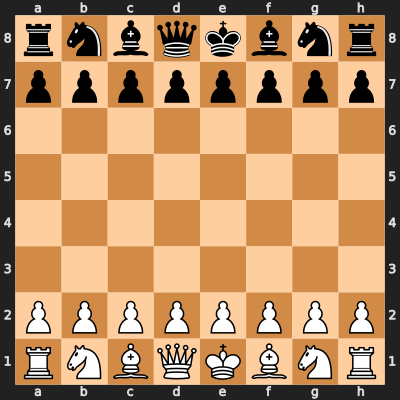

In [16]:
# Import necessary libraries
import chess
from chess.svg import board

# Create an empty chess board
board = chess.Board()

# Display the board in an SVG format
from IPython.display import SVG
SVG(chess.svg.board(board=board, size=400))

This is how a chessboard looks like.

See then, how 2 Queens can threat each other. First you need to know that a Qeen can move in all posible directions in the board, this means it can moves in the entire row, column or diagonal from its position, as it is shown:

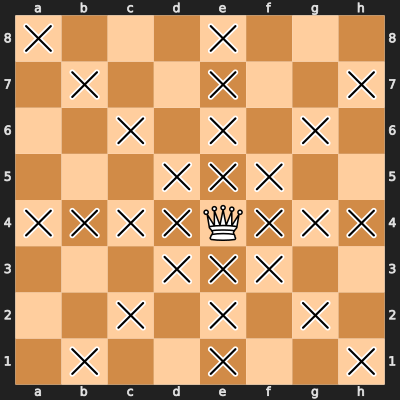

In [17]:
board.clear_board()
# Edit following strings to add/remove figures:
board.set_piece_at(chess.E4, chess.Piece.from_symbol("Q"))

squares = chess.SquareSet()
squares = squares | board.attacks(chess.E4)
# ...
SVG(chess.svg.board(board=board,size=400,squares=squares))

The **X** in the board exemplify where the Qeen is attacking to.

And see how 2 Queens can attack each other in the following image:

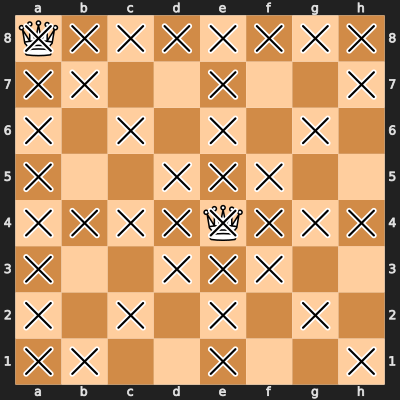

In [18]:
board.clear_board()

board.set_piece_at(chess.E4, chess.Piece.from_symbol("Q"))
board.set_piece_at(chess.A8, chess.Piece.from_symbol("Q"))

squares = chess.SquareSet() | board.attacks(chess.E4) | board.attacks(chess.A8)

SVG(chess.svg.board(board=board,size=400,squares=squares))

It is now easier to understand the problem's difficulty, since the queen attacks a lot of squares in a chess board, it is easy to understand how to put 8 Qeens in the same boarder without any threat among them.

# Basic concepts of Genetic Algorithms (GA) applied to the 8-Queen problem

The basis of GA is to mock Natural Selection and the combination of genes in a certain population.

The following concepts are going to be defined and mapped to the problem of the 8-Queens itself:

1.   Individual (Chromosome)
2.   Gene
3.   Selection operator
4.   Crossover operator
5.   Mutation operator

## Individual

In the Nature, an individual should be an animal, plant, fungus, and so on. For this case an Individual will be a chessboard with 8 Qeens placed in.

## Gene

In the Nature, a gene is part of the Chromosome, creating the genetic rules that forms the Individual. In this case, the genes are going to be 8 pairs of positions x,y of each Queen placed in the chessboard.

## Selection operator

In the case of the animals, and based on the theory of Natural Selection, the ones that manages to propagate its genes to further generations are the stronger individuals. To preserve the species, it is important that external individuals are reproduced with the individuals of a certain clan.

To represent this, this specific algorithm will take the 10% of the fittest individuals of the last generation, to be bypassed to the next generation. The other 80% of the new generation is conformed by the reproduction of the first 50% of the fittest individuals from last generation. And the last 10%, is conformed by random and new individuals.

Here, the fitness of each individual is important, to clasify the individuals in strong/weak.

## Crossover operator

In Nature context, this is related to combine individuals by reproduction, to create a new individual. The mixture inherit in this process, allow the generation to keep its diversity.

Applied this concept to the GA, a crossover point will be chosen, so all the genes ported by Parent 1 before this crossover point are going to be taken and passed to the new individual, and the resto of the genes are going to be taken and passed to the new individual.

So the new chromosome will be formed by a mix of the 2 parents.

## Mutation operator

This algorithm implements genes and individual mutation operator. If something goes wrong in the crossover process, new mutants genes are going to be added to the new child to solve the problem. And in the creation of the new offspring, there is going to be 10% of new mutants that inserts diveristy to the population.

# General steps that a GA should perform to include all the concepts mentioned before into the process of Natural Selection



1.   Create an initial population of random genes
2.   Determine the fitness of the population
3.   Until find the fittest individual, repeat:
     - Select parents from the fittest individuals from the past generation
     - Crossover them, to create new individuals
     - Select the 10% fittest individuals from last generation
     - Introduce mutants
     - Calculate the fitness of this new generation, and see if we reached the solution.

# Implementation

## Imports and defines

Start with simple imports and global variables:

In [19]:
"""
The random module is required to perform random choices, or generate
random numbers for the mutant genes and individuals
"""
import random

"""
The time module is imported to be able to have an interval of time
between generations and see how they are changing
"""
import time

"""
Since the board is 8x8, the max number of columns or rows we can iterate
over is 8.
"""
CHESSBOARD_ROWS_COLS = 8

"""
Global variable to define the population size for each generation
"""
POPULATION_SIZE = 100

"""
A Queen can take positions in the range of x:[0:8[, y:[0:8[, this list
represents the posible positions.
"""
ROWS_COLS_POSIBLE_VALS = [0, 1, 2, 3, 4, 5, 6, 7]

"""
To save memory and simplify all the process, a Queen in the chessboard is
represented by 1
"""
QUEEN = 1

"""
List of generations, to further create statistics and graphs
"""
LIST_OF_GENERATIONS = list()

"""
List of the fitness values of each generation
"""
LIST_OF_FITTNESS = list()

"""
List of the boards of each fittest individual for generation
"""
LIST_OF_BOARDS = list()
LIST_X_POS_FITTEST = list()
LIST_Y_POS_FITTEST = list()

"""
This is only an example of how a chessboard is represented in this algorithm
"""
EXAMPLE_BOARD = [
    [QUEEN, 0, 0, 0, 0, 0, 0, QUEEN],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, QUEEN, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [QUEEN, 0, 0, 0, 0, 0, 0, QUEEN],
]

# ------------ Util and external functions ------------
def print_board(board):
    """
    Function to print the resulting boards from the GA

    :param board: the board to be printed to the console
    """
    for y in range(CHESSBOARD_ROWS_COLS):
        for x in range(CHESSBOARD_ROWS_COLS):
            print(str(board[y][x]) + "  ", end='')
        print("")

print_board(EXAMPLE_BOARD)


1  0  0  0  0  0  0  1  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  1  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
1  0  0  0  0  0  0  1  


## Individual Class definition

In [20]:
class Individual:
    """
    This is the class that defines the Individual, in this case it could be
    reduced to a chessboard with 8 Queens.

    :param fitness:     Integer that defines how accurate an individual is
                        between it and the target fittest individual.
    :param board:       Matrix of integers representing the position of the
                        queens in the chessboard
    :param x_positions: List of integers representing the x positions of all the
                        queens in the board
    :param y_positions: List of integers representing the  positions of all the
                        queens in the board

    """
    def __init__(self, fitness=0, board=None, x_positions=list(), y_positions=list()):
        """
        Constructor
        """
        self.fitness = fitness
        self.board = board
        self.x_positions = x_positions
        self.y_positions = y_positions

    # -- Setters and getters --
    def set_fitness(self, fitness):
        self.fitness = fitness
    def get_fitness(self):
        return self.fitness
    def set_board(self, board):
        self.board = board
    def add_fitness(self):
        self.fitness += 1
    def get_board(self):
        return self.board
    # -- End of setters and getters --

    def create_individual(self):
        """
        The idea is to create a random individual, with eight queens
        randomly located in the chessboard.
        """

        new_board = [
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
        ]

        # random.sample will return a list of 8 random integers between
        # [0:8[
        self.x_positions = random.sample(ROWS_COLS_POSIBLE_VALS, 8)
        self.y_positions = random.sample(ROWS_COLS_POSIBLE_VALS, 8)

        for value in range(CHESSBOARD_ROWS_COLS):
            new_board[self.y_positions[value]][self.x_positions[value]] = QUEEN

        self.set_board(new_board)

    def is_queen_threaten_others(self, x_queen_position, y_queen_position):
        """
        This function returns true if a queen is threating at lest one other
        queen.

        This is how a Queen can threat other Queens, and the directions
        it can go to.

            (1)    (4)     (6)
              x     x     x
                x   x   x
                  x x x
         (2)  x x x Q x x x  (7)
                  x x x
                x   x   x
              x     x     x
            (3)    (5)     (8)

        :param x_queen_position: integer indicating the x position of the
                                 evaluated queen
        :param y_queen_position: integer indicating the y position of the
                                 evaluated queen
        :return: True if the queen is threatening other queen, false otherwise
        :rtype: bool
        """
        board = self.get_board()
        # Evaluating diag 1
        # decrease x
        # decrease y
        temp_x_queen_pos = x_queen_position - 1
        temp_y_queen_pos = y_queen_position - 1
        while temp_y_queen_pos >= 0 and temp_x_queen_pos >= 0:
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_x_queen_pos -= 1
            temp_y_queen_pos -= 1

        # Evaluating row 2:
        # decrease x
        # no change in y
        temp_x_queen_pos = x_queen_position - 1
        temp_y_queen_pos = y_queen_position
        while (temp_x_queen_pos >= 0):
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_x_queen_pos -= 1

        # Evaluating diag 3
        # decrease x
        # increase y
        temp_x_queen_pos = x_queen_position - 1
        temp_y_queen_pos = y_queen_position + 1
        while temp_y_queen_pos < 8 and temp_x_queen_pos >= 0:
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_x_queen_pos -= 1
            temp_y_queen_pos += 1
        # Evaluating col 4
        # no change in x
        # decrease y
        temp_x_queen_pos = x_queen_position
        temp_y_queen_pos = y_queen_position - 1
        while (temp_y_queen_pos >= 0):
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_y_queen_pos -= 1

        # Evaluating col 5
        # no change in x
        # increase y
        temp_x_queen_pos = x_queen_position
        temp_y_queen_pos = y_queen_position + 1
        while (temp_y_queen_pos < 8):
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_y_queen_pos += 1

        # Evaluating diag 6
        # increase x
        # decrease y
        temp_x_queen_pos = x_queen_position + 1
        temp_y_queen_pos = y_queen_position - 1
        while temp_y_queen_pos >= 0 and temp_x_queen_pos < 8:
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_x_queen_pos += 1
            temp_y_queen_pos -= 1
        # Evaluating row 7
        # increase x
        # no change in y
        temp_x_queen_pos = x_queen_position + 1
        temp_y_queen_pos = y_queen_position
        while (temp_x_queen_pos < 8):
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_x_queen_pos += 1

        # Evaluating diag 8
        # increase x
        # increase y
        temp_x_queen_pos = x_queen_position + 1
        temp_y_queen_pos = y_queen_position + 1
        while temp_y_queen_pos < 8 and temp_x_queen_pos < 8:
            if (board[temp_y_queen_pos][temp_x_queen_pos] == QUEEN):
                return True
            temp_x_queen_pos += 1
            temp_y_queen_pos += 1
        # If reaching this point, means the queen is not threating
        # none of the other queens in the board
        return False


    def evaluate_fitness(self):
        """
        Goes through the list of x and y positions where the queens are located
        at, and evaluates if each queen is threating others. The fitness will
        be incremented every time a queen is threating other queen.
        """

        board = self.get_board()

        for value in range(CHESSBOARD_ROWS_COLS):
            if (self.is_queen_threaten_others(self.x_positions[value], self.y_positions[value])):
                self.add_fitness()

    def mate_with_other(self, couple):
        """
        The idea is to produce a new individual from two parents. A crossover
        point is selected randomly. Before this point all the genes from parent
        1 are going to be taken and passed to the child, and befor this point
        the genes from parent 2 are going to be taken to the child

        A position x,y is a gene of the individual.

        :param couple: The parent to mate this parent with.
        :return: A new individual with mutated genes.
        :rtype: list
        """
        individual_child = [
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
        ]

        individual_obj = Individual()

        # Before this point the x & y positions from parent 1 are
        # going to be taken.
        crossover_point = random.choice(ROWS_COLS_POSIBLE_VALS)
        # After this point the x & y positions from parent 2 are
        # going to be taken.

        individual_obj.x_positions = self.x_positions[:crossover_point] + couple.x_positions[crossover_point:8]
        individual_obj.y_positions = self.y_positions[:crossover_point] + couple.y_positions[crossover_point:8]

        all_right = False

        while not all_right:


            repeated_vals = list()

            # Lets see if after the crossover, there are repeated pair positions.
            # If we have repeated pair positions, it means we do not have all 8 queens
            for j in range(8):
                for i in range(8):
                    if j != i and ((individual_obj.x_positions[j], individual_obj.y_positions[j]) == (individual_obj.x_positions[i], individual_obj.y_positions[i])):
                        if i not in repeated_vals:
                            repeated_vals.append(i)
                        if j not in repeated_vals:
                            repeated_vals.append(j)

            # Iterating over the repeated vals, and introducing
            # a mutation:
            if len(repeated_vals) == 0:
                # None repeated positions, so keeping 8 queens,
                # and we can break the loop.
                break

            # If there are repeated vals, lets introduce random genes:
            for value in repeated_vals[1:]:
                individual_obj.x_positions[value] = random.choice(ROWS_COLS_POSIBLE_VALS)
                individual_obj.y_positions[value] = random.choice(ROWS_COLS_POSIBLE_VALS)

        # If we reach out of the while, then set to the new individuals board, the new genes:
        for new_gene in range(CHESSBOARD_ROWS_COLS):
            individual_child[individual_obj.x_positions[new_gene]][individual_obj.y_positions[new_gene]] = QUEEN

        individual_obj.set_board(individual_child)
        return individual_obj


### Explanation of function:

> mate_with_other


The idea is to combine the genes from 2 of the first 50% individuals from the population.

The algorithm will take a "crossover point", before this point the genes from the first parent are going to be taken, and after that point the second parent genes are going to be taken.

Right like the following picture:

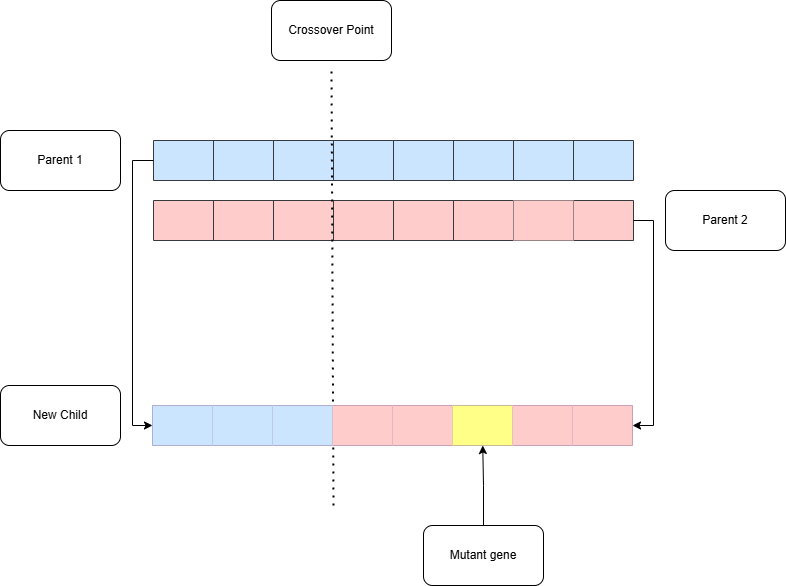

## Population Class definition

In [21]:
class Population:
    """
    This class is intended to encapsulate the process to manipulate
    individuals, and records the generation with its population

    :param generation: integer recordin in wich generation is the process
                       selection
    """

    def __init__(self, population=None, generation=0):
        self.first_population = list()
        self.generation = generation

    # -- Setters & getters --
    def get_first_population(self):
        return self.first_population

    def set_first_population(self, new_population):
        self.first_population = new_population
    # -- End of setters & getters --


    def create_initial_population(self):
        """
        The idea is to create 100 boards, each one with 8 queens randomly
        placed. These 100 boards are the total population.
        """
        for individual in range(POPULATION_SIZE):
            individual_obj = Individual()
            individual_obj.create_individual()
            individual_obj.set_fitness(0)
            self.first_population.append(individual_obj)

    def create_mutant_population(self, individual_quantity):
        """
        Creates new individuals with random genes, to be introduced
        to the next generation, to keep diversity

        :param individual_quantity: the number of individuals that we
        is required to be inserted in a new population.
        :return: A list of new random individuals
        :rtype: list
        """
        mutant_population = list()
        for individual in range(individual_quantity):
            individual_obj = Individual()
            individual_obj.create_individual()
            mutant_population.append(individual_obj)

        return mutant_population

    def evaluate_population_fitness(self):
        """
        The idea is to count how many queens are
        not threaten others in an individual. For
        each queen threaten others, a point is added.

        The worst individual will have a fitness of 8.
        The best individual will have a fitness of 0.
        """
        population = self.get_first_population()
        for individual in population:
            individual.evaluate_fitness()


## Main GA loop

In [22]:
def main():
    random.seed()
    population = Population()

    # Create the initial population with random values as new genes for
    # each individual
    population.create_initial_population()

    # Evaluating the first generation, could be probable to find the fittest
    # individual in the first try
    population.evaluate_population_fitness()

    # Sort the population based on the individual
    # fitness score
    sorted_population = sorted(population.get_first_population(), key=lambda individual:individual.fitness)
    population.set_first_population(sorted_population)

    # Generation counter
    generation = 1

    # Flag to indicate if we found the fittest individual
    found_the_fittest = False

    while not found_the_fittest :

        # See if the first individual's fitness is 0:
        if population.get_first_population()[0].fitness == 0:
            found_the_fittest = True
            #break

        new_generation = list()

        # Get the best 10% of the last generation individuals:
        first_10_individuals = int(POPULATION_SIZE * 0.10)
        new_generation.extend(population.get_first_population()[:first_10_individuals])

        # Add 10% of mutants:
        new_generation.extend(population.create_mutant_population(int(POPULATION_SIZE*0.10)))

        # Will mate the first 50% of the fittest individuals each others to
        # create the other 80% of individuals of the next generation.
        for value in range(int(POPULATION_SIZE*0.80)):
            parent_1 = random.choice(population.get_first_population()[:int(POPULATION_SIZE*0.50)])
            parent_2 = random.choice(population.get_first_population()[:int(POPULATION_SIZE*0.50)])

            # Crossover process
            new_child = parent_1.mate_with_other(parent_2)
            new_generation.append(new_child)

        population.set_first_population(new_generation)

        population.evaluate_population_fitness()

        sorted_population = sorted(population.get_first_population(), key=lambda individual:individual.fitness)

        population.set_first_population(sorted_population)


        print("Generation " + str(generation) + " fitness: " + str(population.get_first_population()[0].fitness))
        LIST_OF_GENERATIONS.append(generation)
        LIST_OF_FITTNESS.append(population.get_first_population()[0].fitness)
        LIST_OF_BOARDS.append(population.get_first_population()[0].get_board())
        LIST_X_POS_FITTEST.append(population.get_first_population()[0].x_positions)
        LIST_Y_POS_FITTEST.append(population.get_first_population()[0].y_positions)
        print("Optimal individual:")
        print_board(population.get_first_population()[0].get_board())
        generation += 1

Creating a new generation is one of the most important parts of the genetic algorithm. Keeping diversity must be a priority in this stage, a very low ratio of mutant individuals will keep the algorithm stuck at a minimal point without converging. With a high ratio of mutants, the algorithm will diverge and never find the solution.The parameters established in this implementation are set by a trial-and-error process until the algorithm can converge on the fittest individual, so the specific values for other GA's may vary.

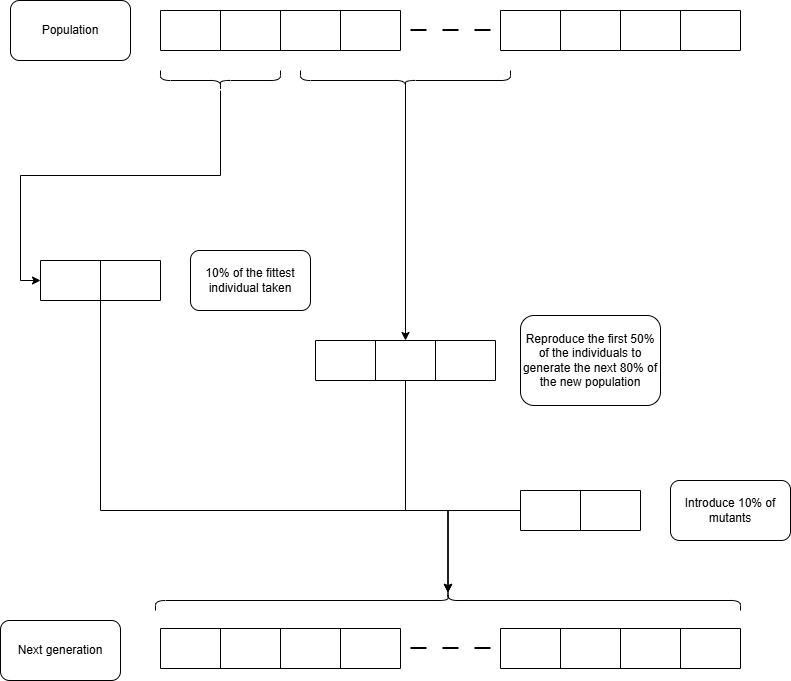

## Execution of the Algorithm and post process information

In [23]:
# Start the GA
main()

Generation 1 fitness: 4
Optimal individual:
0  1  0  0  0  0  0  0  
0  0  0  1  0  0  0  0  
1  0  0  0  0  0  0  0  
0  0  0  0  0  0  1  0  
0  0  0  0  1  0  0  0  
0  0  1  0  0  0  0  0  
0  0  0  0  0  1  0  0  
0  0  0  0  0  0  0  1  
Generation 2 fitness: 2
Optimal individual:
1  0  0  0  0  0  0  0  
0  0  0  1  0  0  0  0  
0  0  0  0  0  1  0  0  
0  0  0  0  0  0  0  1  
0  1  0  0  0  0  0  0  
0  0  0  0  0  0  1  0  
0  0  0  0  1  0  0  0  
0  0  1  0  0  0  0  0  
Generation 3 fitness: 4
Optimal individual:
1  0  0  0  0  0  0  0  
0  0  0  1  0  0  0  0  
0  0  0  0  0  1  0  0  
0  0  0  0  0  0  0  1  
0  1  0  0  0  0  0  0  
0  0  0  0  0  0  1  0  
0  0  0  0  1  0  0  0  
0  0  1  0  0  0  0  0  
Generation 4 fitness: 3
Optimal individual:
0  0  0  0  0  1  0  0  
0  0  0  1  0  0  0  0  
0  0  1  0  0  0  0  0  
1  0  0  0  0  0  0  0  
0  0  0  0  0  0  1  0  
0  0  0  0  1  0  0  0  
0  0  0  0  0  0  0  1  
0  1  0  0  0  0  0  0  
Generation 5 fitness: 4


In [24]:
pip install cairosvg

# Showing results and statistics

This section is intended to show how the boards were evolving from the primitive generations to the fittest one. The solutions shown in the resulting .gif are only the first members of each generation.

Then, there will be a graph exposing the fitness score for each generation.

## Showing the evolution of the generations, from the most primitive one to the fittest one

In [81]:
import io
from PIL import Image, ImageDraw, ImageFont
import cairosvg

def svg_to_gif_in_memory(svg_list, gif_path, list_of_fitness, duration=200, loop=0):
    """
    Converts a list of SVG images in memory to a single GIF file.

    :param svg_list: A list of strings, where each string is an SVG image.
    :param gif_path: The output path for the generated GIF file.
    :param duration: The duration of each frame in milliseconds.
    : param loop: The number of times the GIF should loop (0 for infinite loop).
    """
    images = []
    image_index = 0
    for svg_data in svg_list:
        png_bio = io.BytesIO()
        cairosvg.svg2png(svg_data, write_to=png_bio)
        png_bio.seek(0)
        image = Image.open(png_bio)
        draw = ImageDraw.Draw(image)
        bg_color = (0, 0, 0, 128)
        draw.rectangle((0, 0, 400, 20), fill=bg_color)
        # Found the fonts in "/usr/share/fonts/truetype"
        font = ImageFont.truetype("LiberationMono-Italic.ttf", size=20)
        caption_text = "Generation: " + str(image_index) + \
                       ", fitness: " + str(list_of_fitness[image_index])
        draw.text((0, 0), caption_text, fill=(255, 255, 255), font=font)
        images.append(image)
        image_index += 1

    for i in range(100):
        png_bio = io.BytesIO()
        cairosvg.svg2png(svg_list[-1], write_to=png_bio)
        png_bio.seek(0)
        image = Image.open(png_bio)
        draw = ImageDraw.Draw(image)
        bg_color = (0, 0, 0, 128)
        draw.rectangle((0, 0, 400, 20), fill=bg_color)
        # Found the fonts in "/usr/share/fonts/truetype"
        font = ImageFont.truetype("LiberationMono-Italic.ttf", size=20)
        caption_text = "Generation: " + str(image_index-1) + \
                       ", fitness: " + str(list_of_fitness[image_index-1])
        draw.text((0, 0), caption_text, fill=(255, 255, 255), font=font)
        images.append(image)

    if images:
        images[0].save(
            gif_path,
            save_all=True,
            append_images=images[1:],
            duration=duration,
            loop=loop
        )
    else:
        print("No images to save.")

In [82]:
# Create a .gif with the solutions:

board.clear_board()

len_generations = len(LIST_OF_FITTNESS)
last_ind_y = LIST_Y_POS_FITTEST[-1]
last_ind_x = LIST_X_POS_FITTEST[-1]

list_svn_boards = list()

for generations in range(len_generations):
    board.clear_board()
    for i in range(8):
        board.set_piece_at(chess.square(LIST_X_POS_FITTEST[generations][i], LIST_Y_POS_FITTEST[generations][i]), chess.Piece.from_symbol("q"))
    board = board.mirror()
    list_svn_boards.append(bytes(chess.svg.board(board=board,size=400), 'utf-8'))

gif_path = "/full_gen_solution.gif"
svg_to_gif_in_memory(list_svn_boards, gif_path, LIST_OF_FITTNESS)

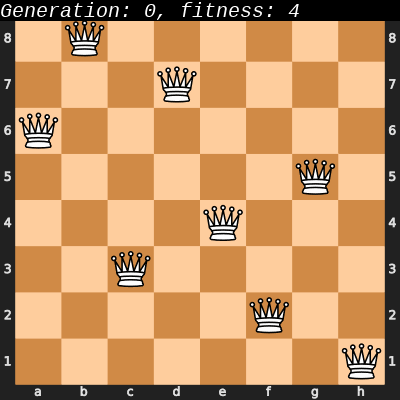

In [83]:
from IPython import display

# Show the .gif of the solutions:
display.Image(filename=gif_path)

## Showing the graph Generation vs Fitness score:

The idea is to see how the algorithm is converging to the solution.

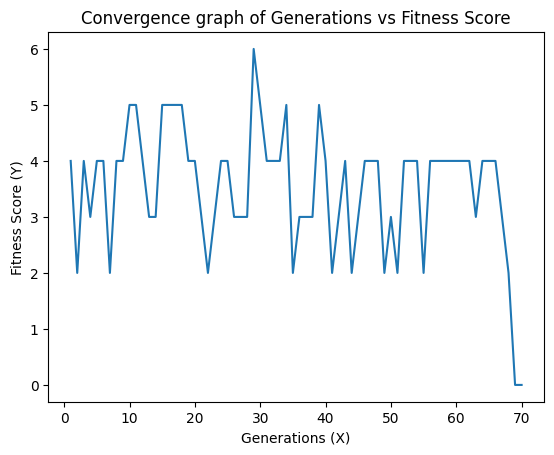

In [28]:
import matplotlib.pyplot as plt


# Create the plot
plt.plot(LIST_OF_GENERATIONS, LIST_OF_FITTNESS)

# Add labels and title
plt.xlabel("Generations (X)")
plt.ylabel("Fitness Score (Y)")
plt.title("Convergence graph of Generations vs Fitness Score")

# Show the plot
plt.show()